In [1]:
from textblob import TextBlob
import json
import re
import urllib
import datetime
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from nltk.corpus import sentiwordnet as swn
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import pytz

In [2]:
df=pd.read_csv("gohawks_sentiment.csv")

In [3]:
pst_tz = pytz.timezone('US/Pacific')

In [4]:
pattern='Redmund, WA|Seattle, WA|Kirkland, WA|Seattle|Washington|WA$|Kirkland,'
pattern_pat ='MA,Boston|MA$|Massachusetts'

In [16]:
df=df[df['location'].str.contains(pattern, na = False)]

In [17]:
df.head()

,citation_date,firstpost_date,author,total_citations,followers,influence_level,ranking_score,replies,impressions,favourite_count,hour,1,location,title
1,1421259536,1419864008,Marina EQ,2,258,NaN,3.646109,0,162,0,10,1,"Redmond, WA",twelfth dogs are ready! #gohawks #dogslife htt...
3,1421468519,1419881240,Becca Delgado,5,22,NaN,3.500887,0,5,0,20,1,Seattle,"""Oh no big deal, just NFC West Champs and the ..."
8,1421468247,1419986583,Becca Delgado,2,22,NaN,4.304159,0,5,1,20,1,"Seattle, WA",Hi my name is Lori and I'm a @Seahawks addict!...
9,1421468176,1420042851,Becca Delgado,2,22,NaN,3.718140,0,5,1,20,1,"McChord AFB, WA",@FiveThirtyEight #GoHawks. Keep your eyes on t...
10,1421468144,1420052779,Becca Delgado,2,22,NaN,3.441431,0,5,6,20,1,Washington state,One of my Favorite Hawk logos that went around...


In [18]:
sentences=[]

for row in df.itertuples(2):
    tweet_date = row.citation_date
    #tweet_dt = datetime.datetime.fromtimestamp(tweet_date)
    tweet_dt = datetime.datetime.fromtimestamp(tweet_date, pst_tz)
    day = tweet_dt.day
    month = tweet_dt.month
    time = tweet_dt.hour
    if day == 01 and month == 02 and time >= 18:
        tweet = row.title            
        tweet = tweet.replace("@","")
        tweet = tweet.replace("\n", " ")
        tweet = re.sub(r'[^\x00-\x7F]+',' ', tweet)
        blob = TextBlob(tweet)
        #blob.translate(to='es')
        if blob.detect_language() != 'en':
            continue

        tweet_split = blob.split(" ")
        words=[]
        for word in tweet_split:
            if word.startswith("http") or word.startswith("#"):
                pass
            else:
                words.append(word)

        new_tweet=""

        for word in words:
            new_tweet = new_tweet + word + " "
            
        new_tweet.strip()

        sentences.append(new_tweet)
                        
print "Total tweets read=",len(sentences)

Total tweets read= 3470


In [6]:
def sentiWordAnalysis(example_sent):
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(example_sent)
    filtered_sentence = [w for w in word_tokens if not w in stop_words]
    pos=neg=0
    for word in filtered_sentence:
        #print "word=",word
        if swn.senti_synsets(word):
            ss_set = list(swn.senti_synsets(word))[0]
            if ss_set:
                pos = pos+ss_set.pos_score()
                neg = neg+ss_set.neg_score()
                #obj = obj+swn.synsets.obj.score()

    #print "Positive=",pos
    #print "Negative=",neg
    return pos, neg

In [19]:
pos_count=0
neg_count=0
pos_val=0
neg_val=0
values=[]
count=0

for i in range(0, len(sentences)):
    pos, neg = sentiWordAnalysis(sentences[i])
    if pos > neg:
        pos_count+=1
        values.append(1)
    else:
        neg_count+=1
        values.append(-1)

print "Total Positive=", pos_count
print "Total Negative=", neg_count

Total Positive= 1439
Total Negative= 2031


In [26]:
print count

391


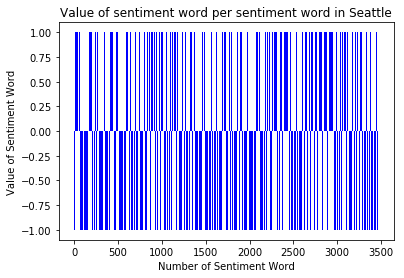

In [20]:
plt.bar(range(0, len(values)), values, edgecolor='none',color='b')
plt.xlabel("Number of Sentiment Word")
plt.ylabel("Value of Sentiment Word")
plt.title("Value of sentiment word per sentiment word in Seattle")
plt.show()

In [10]:
DF=pd.read_csv("gopatriots_all.csv")

In [11]:
DF=DF[DF['location'].str.contains(pattern_pat, na = False)]

In [12]:
DF.head()

,citation_date,author,retweetcount,follower_count,influence_level,ranking_score,replies,impressions,favorite_count,hour_of_the_day,tweet_count,location,title
0,1421257541,Alex Kroll,6,2895,NaN,4.640276,0,2695,0,9,1,"Boston, Massachusetts",LeGarrette Blount does the Ray Lewis Dance #Th...
7,1421241439,Christina Ballin,2,34,0.0,4.016089,0,16,0,5,1,"Boston, Massachusetts",@christinaballin thanks for the follow! \r\n#G...
15,1421248980,Kathleen Williams,1,1101,NaN,3.985633,0,1064,0,7,1,Massachusetts,@honeychocolate9 You too!! Only 4 more days un...
21,1421261228,Joe Chancler,1,132,1.0,3.584905,0,131,0,10,1,"Boston, MA",@NESportsFan1106 thank you for the follow back...
41,1421327128,Boston Sports Fan,1,3811,NaN,4.523253,0,3391,0,5,1,"Boston, Massachusetts",@mrsawesome143 thanks for the follow! \r\n#GoP...


In [13]:
sentences_pat=[]

for row in DF.itertuples(2):
    tweet_date = row.citation_date
    tweet_dt = datetime.datetime.fromtimestamp(tweet_date, pst_tz)
    day = tweet_dt.day
    month = tweet_dt.month
    time = tweet_dt.hour
    if day == 01 and month == 02 and time >= 18:
        tweet = row.title            
        tweet = tweet.replace("@","")
        tweet = tweet.replace("\n", " ")
        tweet = re.sub(r'[^\x00-\x7F]+',' ', tweet)
        blob = TextBlob(tweet)
        #blob.translate(to='es')
        if blob.detect_language() != 'en':
            continue

        tweet_split = blob.split(" ")
        words=[]
        for word in tweet_split:
            if word.startswith("http") or word.startswith("#"):
                pass
            else:
                words.append(word)

        new_tweet=""

        for word in words:
            new_tweet = new_tweet + word + " "
            
        new_tweet.strip()

        sentences_pat.append(new_tweet)
                        
print "Total tweets read=",len(sentences_pat)

Total tweets read= 2646


In [14]:
pos_count_p=0
neg_count_p=0
values_pat=[]

for i in range(0, len(sentences_pat)):
    pos, neg = sentiWordAnalysis(sentences_pat[i])
    if pos > neg:
        pos_count_p+=1
        values_pat.append(1)
    elif neg > pos:
        neg_count_p+=1
        values_pat.append(-1)
    else:
        continue

print "Total Positive=", pos_count_p
print "Total Negative=", neg_count_p

Total Positive= 1109
Total Negative= 484


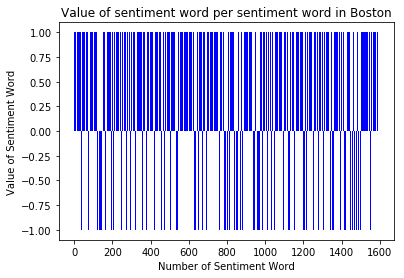

In [15]:
plt.bar(range(0, len(values_pat)), values_pat, edgecolor='none',color='b')
plt.xlabel("Number of Sentiment Word")
plt.ylabel("Value of Sentiment Word")
plt.title("Value of sentiment word per sentiment word in Boston")
plt.show()